Details
Binary Classification Problem
Kaggle Dataset,
Process
CNN With Small Dataset
Data Augmentation
Transfer Learning


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow
from tensorflow import keras

2024-08-22 18:42:00.520205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading the Dataset

In [3]:
train_dir = "/Users/akarshitsingh/Deep Learning/Data set, Presentation and Python Notebook for Image recognition project module/cats_and_dogs/train"
validation_dir = "/Users/akarshitsingh/Deep Learning/Data set, Presentation and Python Notebook for Image recognition project module/cats_and_dogs/validation"
test_dir = "/Users/akarshitsingh/Deep Learning/Data set, Presentation and Python Notebook for Image recognition project module/cats_and_dogs/test"

Data Pre-Processing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150, 150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Training the model

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

2024-08-22 18:42:02.902891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

/Users/akarshitsingh/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
history = model.fit(train_generator,
                             steps_per_epoch = 100, 
                             epochs= 40,
                             validation_data = validation_generator,
                             validation_steps = 50)


Epoch 1/40
100/100 [==============================] - 38s 374ms/step - loss: 0.6882 - acc: 0.5445 - val_loss: 0.6753 - val_acc: 0.5450
Epoch 2/40
100/100 [==============================] - 38s 382ms/step - loss: 0.6612 - acc: 0.6090 - val_loss: 0.6774 - val_acc: 0.5380
Epoch 3/40
100/100 [==============================] - 38s 385ms/step - loss: 0.6096 - acc: 0.6685 - val_loss: 0.6135 - val_acc: 0.6590
Epoch 4/40
100/100 [==============================] - 39s 388ms/step - loss: 0.5702 - acc: 0.7095 - val_loss: 0.6076 - val_acc: 0.6490
Epoch 5/40
100/100 [==============================] - 39s 388ms/step - loss: 0.5357 - acc: 0.7225 - val_loss: 0.5912 - val_acc: 0.6690
Epoch 6/40
100/100 [==============================] - 39s 389ms/step - loss: 0.4988 - acc: 0.7490 - val_loss: 0.5729 - val_acc: 0.6870
Epoch 7/40
100/100 [==============================] - 40s 398ms/step - loss: 0.4691 - acc: 0.7770 - val_loss: 0.5746 - val_acc: 0.7010
Epoch 8/40
100/100 [==============================] - 4

In [11]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')


Found 1000 images belonging to 2 classes.


In [12]:
model.evaluate(test_generator, steps = 50)

50/50 [==============================] - 7s 130ms/step - loss: 1.4747 - acc: 0.7120


[1.4747467041015625, 0.7120000123977661]

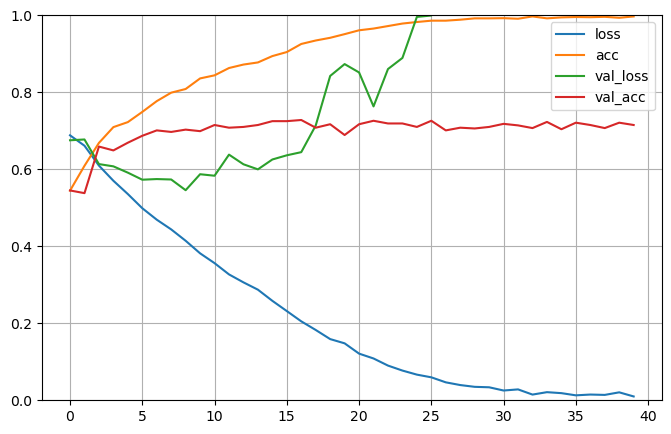

In [13]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.save("model.h5")

from tensorflow.keras import backend as K
K.clear_session()
del model

Data Augmentation, 
Data Preprocessing

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150, 150),
                                                       batch_size = 32,
                                                       class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Training & Result

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [18]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

/Users/akarshitsingh/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
history = model.fit(train_generator,
                             steps_per_epoch = 62, 
                             epochs= 100,
                             validation_data = validation_generator,
                             validation_steps = 31)


Epoch 1/100
62/62 [==============================] - 49s 786ms/step - loss: 0.6921 - acc: 0.5229 - val_loss: 0.6812 - val_acc: 0.5544
Epoch 2/100
62/62 [==============================] - 47s 764ms/step - loss: 0.6859 - acc: 0.5452 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 3/100
62/62 [==============================] - 58s 930ms/step - loss: 0.6701 - acc: 0.5640 - val_loss: 0.6661 - val_acc: 0.5605
Epoch 4/100
62/62 [==============================] - 48s 774ms/step - loss: 0.6644 - acc: 0.5747 - val_loss: 0.6646 - val_acc: 0.5907
Epoch 5/100
62/62 [==============================] - 47s 756ms/step - loss: 0.6535 - acc: 0.6087 - val_loss: 0.6320 - val_acc: 0.6431
Epoch 6/100
62/62 [==============================] - 47s 752ms/step - loss: 0.6455 - acc: 0.6194 - val_loss: 0.6264 - val_acc: 0.6532
Epoch 7/100
62/62 [==============================] - 46s 737ms/step - loss: 0.6300 - acc: 0.6402 - val_loss: 0.6664 - val_acc: 0.5988
Epoch 8/100
62/62 [==============================] - 46s 734ms

In [20]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')


Found 1000 images belonging to 2 classes.


In [21]:
model.evaluate(test_generator, steps = 50)

50/50 [==============================] - 4s 82ms/step - loss: 0.4398 - acc: 0.7820


[0.4397725760936737, 0.7820000052452087]

In [22]:
model.save("project_cnn.h5")

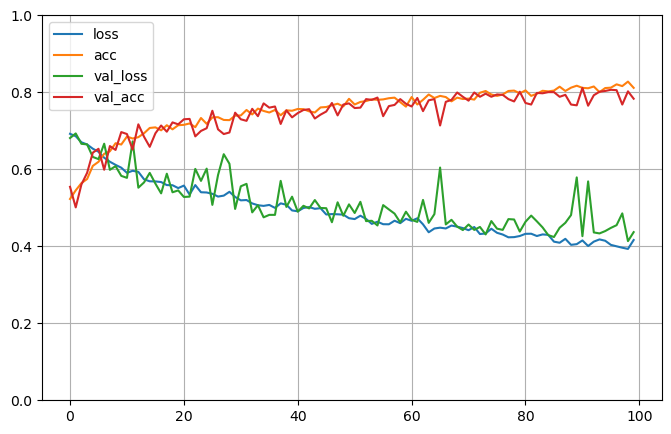

In [23]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
from tensorflow.keras import backend as K

K.clear_session()
del model

VGG16

Data Preprocessing

In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150, 150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Training & Testing

In [27]:
from tensorflow.keras.applications import VGG16
conv_base=VGG16(weights="imagenet",
                       include_top=False,
                       input_shape=(150,150,3))

In [28]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [29]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 2e-5), metrics = ['acc'])

/Users/akarshitsingh/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [32]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Cat_Dog.h5", save_best_only = True)

In [33]:
history = model.fit(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 50,
                             callbacks = [checkpoint_cb])

Epoch 1/30
100/100 [==============================] - 3177s 32s/step - loss: 0.4558 - acc: 0.7650 - val_loss: 0.2185 - val_acc: 0.9040
Epoch 2/30
100/100 [==============================] - 2625s 26s/step - loss: 0.2776 - acc: 0.8850 - val_loss: 0.1325 - val_acc: 0.9460
Epoch 3/30
100/100 [==============================] - 827s 8s/step - loss: 0.2204 - acc: 0.9120 - val_loss: 0.1721 - val_acc: 0.9240
Epoch 4/30
100/100 [==============================] - 895s 9s/step - loss: 0.1648 - acc: 0.9380 - val_loss: 0.1173 - val_acc: 0.9440
Epoch 5/30
100/100 [==============================] - 975s 10s/step - loss: 0.1424 - acc: 0.9460 - val_loss: 0.0951 - val_acc: 0.9620
Epoch 6/30
100/100 [==============================] - 1121s 11s/step - loss: 0.1282 - acc: 0.9550 - val_loss: 0.1056 - val_acc: 0.9570
Epoch 7/30
100/100 [==============================] - 1095s 11s/step - loss: 0.1299 - acc: 0.9505 - val_loss: 0.0844 - val_acc: 0.9720
Epoch 8/30
100/100 [==============================] - 890s 9

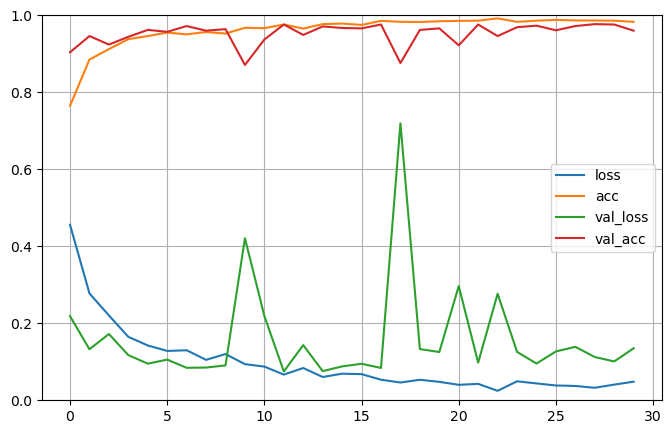

In [34]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()